In [10]:
import numpy as np
import matplotlib.pyplot as plt

freq = 15 * 1e6 # in MHz

c = 3e8 # in m/s
wavelength = c / freq # in m
max_depth = wavelength / 2 

A = 0.5


1.2566371 1.8849558


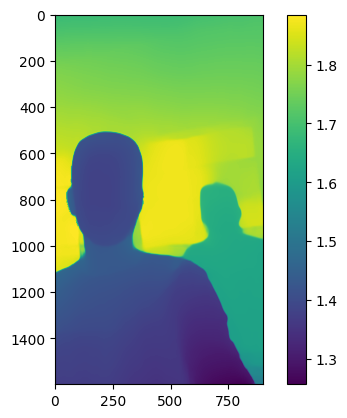

In [11]:
depth_img = np.load('./sample_data/yo_depth.npy') + 2
(nr, nc) = depth_img.shape
k = 4

fase_img = (2 * depth_img / wavelength) * 2 * np.pi

plt.imshow(fase_img)
plt.colorbar()

print(np.min(fase_img), np.max(fase_img))

In [12]:
angle =  np.pi

g0 = A / 2 * np.cos(angle)
g1 = - A / 2 * np.sin(angle)
g2 = - A / 2 * np.cos(angle)
g3 = A / 2 * np.sin(angle)

a = np.arctan2(g3 - g1, g0 - g2) 

a == angle

True

Text(0.5, 1.0, 'g3')

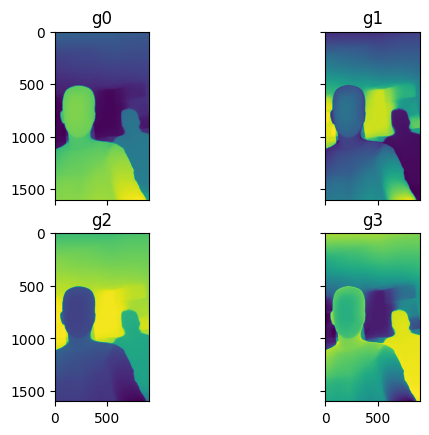

In [14]:
g0 = A / 2 * np.cos(fase_img)
g1 = - A / 2 * np.sin(fase_img)
g2 = - A / 2 * np.cos(fase_img)
g3 = A / 2 * np.sin(fase_img)

# 4 subplots sharing both x/y axes

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)
axs[0, 0].imshow(g0)
axs[0, 0].set_title('g0')
axs[0, 1].imshow(g1)
axs[0, 1].set_title('g1')
axs[1, 0].imshow(g2)
axs[1, 0].set_title('g2')
axs[1, 1].imshow(g3)
axs[1, 1].set_title('g3')


In [15]:
fases = np.arctan2(g3 - g1, g0 - g2) 
print(np.min(fases), np.max(fases))

1.2566371 1.8849558


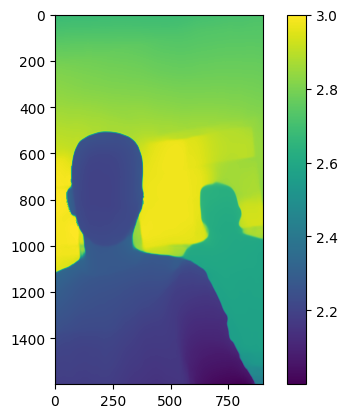

In [16]:
depth = (c/2) * ( fases / (2 * np.pi * 3e8/(10*2) ) )

plt.imshow(depth)
plt.colorbar()

2.0000002 3.0000005
2.0 3.0


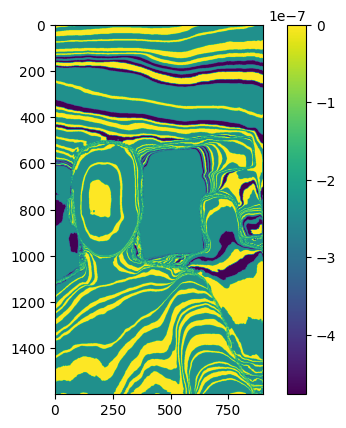

In [17]:


plt.imshow(depth_img - depth)
plt.colorbar()

print(np.min(depth), np.max(depth))
print(np.min(depth_img), np.max(depth_img))